# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox as ljungbox
import matplotlib.gridspec as gridspec
from scipy.stats import chi2
from pandas.plotting import lag_plot


import os
print(os.listdir(r"C:\Users\Oussama\Desktop\python"))

['.ipynb_checkpoints', 'athlete_events.csv', 'c.csv', 'covid-19-datasets-1200x900.jpg', 'Covid_19_Dataset_Morocco.csv', 'Data_F.csv', 'data_MAR_2.csv', 'df10.csv', 'df9.csv', 'mathm9nich.ipynb', 'new3.csv', 'noc_regions.csv', 'Olympics.ipynb', 'Olympics_Boujbair.ipynb', 'our_data.csv', 'owid-covid-data.csv', 'projet_SC.ipynb', 'sere_temp1.ipynb', 'serie_temp - Copie (2).ipynb', 'serie_temp - Copie.ipynb', 'serie_temp.ipynb', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'VosQuestions.ipynb']


# Import Data

In [2]:
data_covid =pd.read_csv('owid-covid-data.csv')
data_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153625,ZWE,Africa,Zimbabwe,2022-01-06,220178.0,1121.0,1207.143,5108.0,16.0,15.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
153626,ZWE,Africa,Zimbabwe,2022-01-07,221282.0,1104.0,1146.286,5136.0,28.0,18.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
153627,ZWE,Africa,Zimbabwe,2022-01-08,221918.0,636.0,1100.571,5148.0,12.0,18.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
153628,ZWE,Africa,Zimbabwe,2022-01-09,221918.0,0.0,1100.571,5148.0,0.0,18.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


# Extract data specific to Morocco with specific columns

In [3]:
data_MAR=data_covid[data_covid['iso_code']=='MAR'].filter(['location','date','new_cases','total_cases','new_deaths','total_deaths'], axis=1)
data_MAR.sample(5)

,location,date,new_cases,total_cases,new_deaths,total_deaths
95114,Morocco,2020-03-06,0.0,2.0,NaN,NaN
95375,Morocco,2020-11-22,3979.0,324941.0,60.0,5316.0
95423,Morocco,2021-01-09,1416.0,451637.0,24.0,7709.0
95424,Morocco,2021-01-10,895.0,452532.0,34.0,7743.0
95639,Morocco,2021-08-13,10752.0,741836.0,112.0,10823.0


# Reset the index of Data

In [4]:
def reset_my_index(df):
  res = df.reset_index(drop=True) # function to reverse order of row and resets index
  return(res)
reset_my_index(data_MAR)

,location,date,new_cases,total_cases,new_deaths,total_deaths
0,Morocco,2020-02-07,NaN,NaN,NaN,NaN
1,Morocco,2020-02-08,NaN,NaN,NaN,NaN
2,Morocco,2020-02-09,NaN,NaN,NaN,NaN
3,Morocco,2020-02-10,NaN,NaN,NaN,NaN
4,Morocco,2020-02-11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
699,Morocco,2022-01-06,6050.0,983629.0,11.0,14883.0
700,Morocco,2022-01-07,6428.0,990057.0,13.0,14896.0
701,Morocco,2022-01-08,7064.0,997121.0,8.0,14904.0
702,Morocco,2022-01-09,4963.0,1002084.0,7.0,14911.0


# Extract data with two columns: date and new_cases

In [14]:
data_MAR_2 = data_MAR.loc[:,['date','new_cases']]
data_MAR.dropna(subset = ["new_cases"], inplace=True) # drop empty rows 
data_MAR_2.to_csv(r'C:\Users\Oussama\Desktop\python\data_MAR_2.csv', index = False) # save data_MAR_2 in a csv file
Data_F = pd.read_csv('data_MAR_2.csv',index_col='date') # take column date as an index of data
Data_F.to_csv(r'C:\Users\Oussama\Desktop\python\Data_F.csv', index = False) # # save Data_F in a csv file
Data_F.index = pd.to_datetime(Data_F.index)
Data_F.head()

,new_cases
date,
2020-03-02,1.0
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,1.0
2020-03-06,0.0


# Training data

In [15]:
train=Data_F.sample(frac=0.8,random_state=200)
train

,new_cases
date,
2021-09-25,1444.0
2020-12-30,2143.0
2021-07-17,2853.0
2021-05-24,90.0
2021-04-06,696.0
...,...
2021-07-22,1402.0
2021-06-30,776.0
2020-03-12,1.0


# Testing data

In [16]:
test=Data_F.drop(train.index)
test

,new_cases
date,
2020-03-02,1.0
2020-03-04,0.0
2020-03-08,0.0
2020-03-09,0.0
2020-03-19,14.0
...,...
2021-12-27,291.0
2022-01-04,4299.0
2022-01-05,5618.0


# Graphic representations

Text(0, 0.5, 'Daily new infections by covid-19')

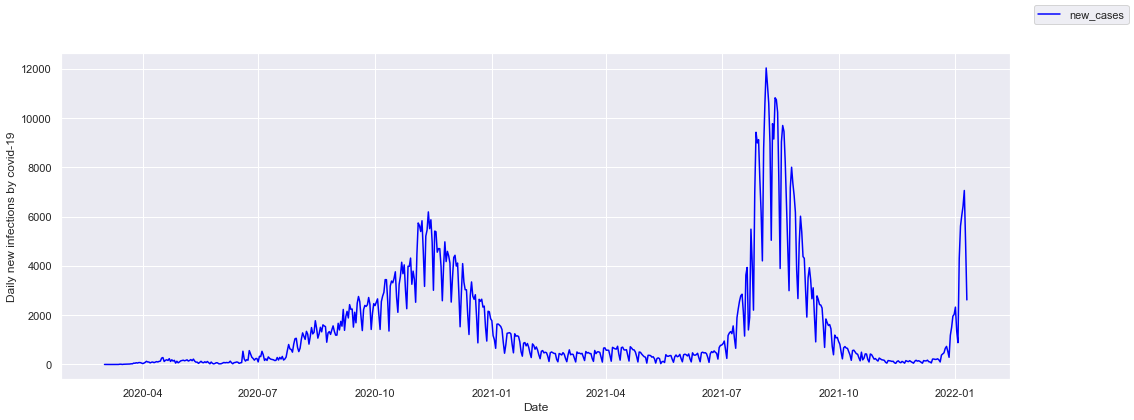

In [18]:
fig,ax = plt.subplots(figsize=(17,6))
rolling_avg = 1
ax.plot(Data_F.index,Data_F['new_cases'].rolling(window=rolling_avg).mean(),color='blue',label='new_cases')
ax.figure.legend()
sns.set()
sns.set_style("darkgrid")
ax.set_xlabel('Date')
ax.set_ylabel('Daily new infections by covid-19')

Text(0, 0.5, 'Daily new infections')

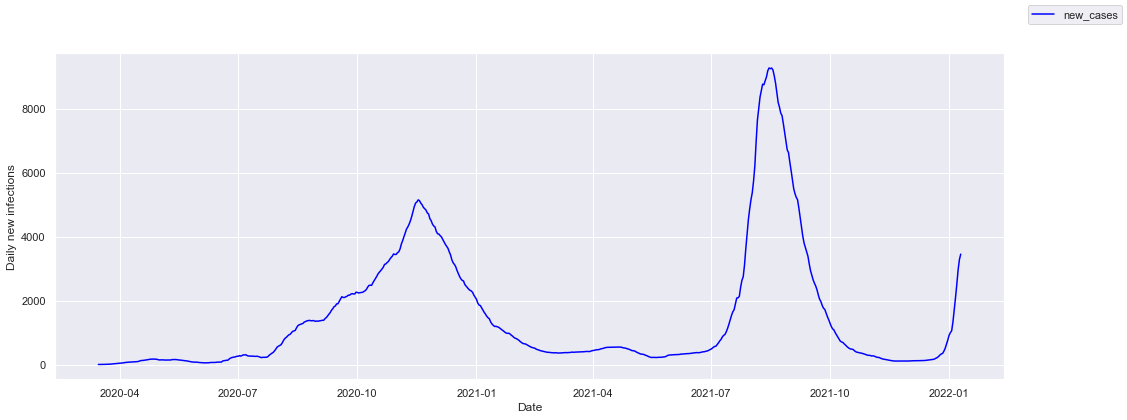

In [19]:
fig,ax = plt.subplots(figsize=(17,6))
rolling_avg = 14
ax.plot(Data_F.index,Data_F['new_cases'].rolling(window=rolling_avg).mean(),color='blue',label='new_cases')
ax.figure.legend()
sns.set()
sns.set_style("darkgrid")
ax.set_xlabel('Date')
ax.set_ylabel('Daily new infections')

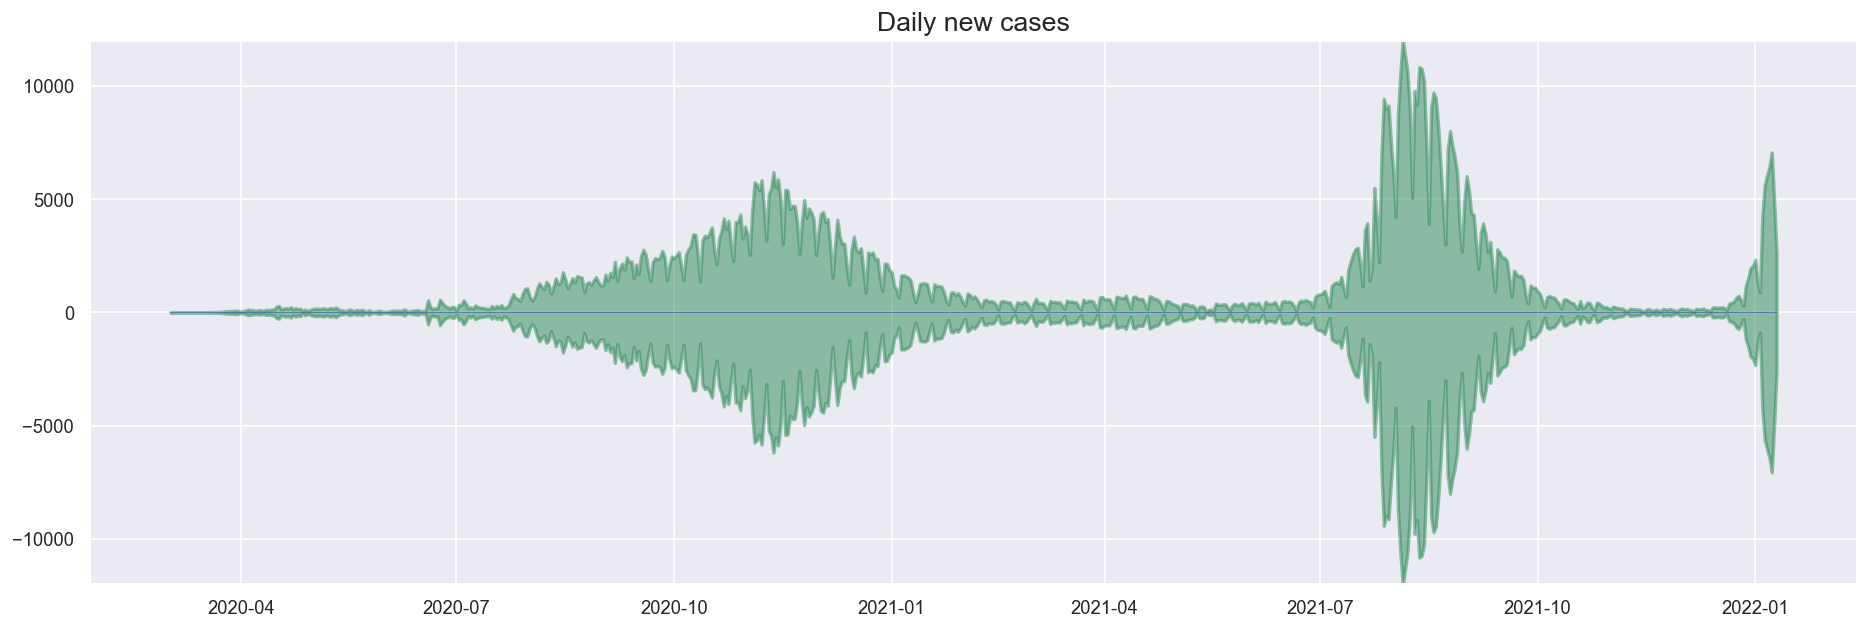

In [20]:
x = Data_F.index
y1 = Data_F['new_cases'].values

fig, ax = plt.subplots(1, 1, figsize=(19,6), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-12000, 12000)
plt.title('Daily new cases', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

In [21]:
Data_F.corr()

,new_cases
new_cases,1.0


Text(0.5, 1.0, 'Correlation Heatmap')

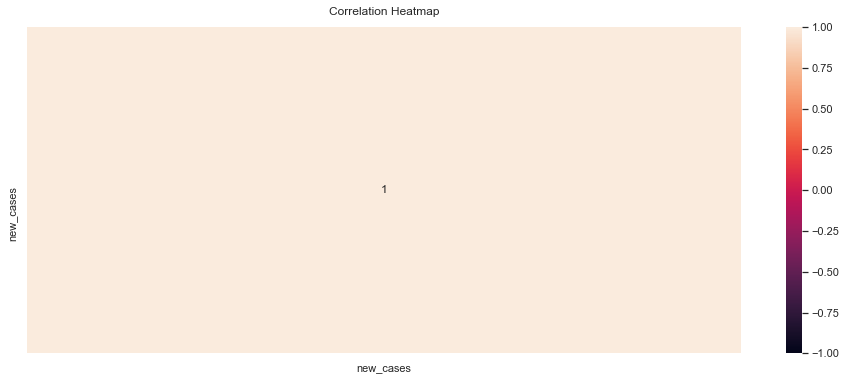

In [22]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Data_F.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#  Time series model :

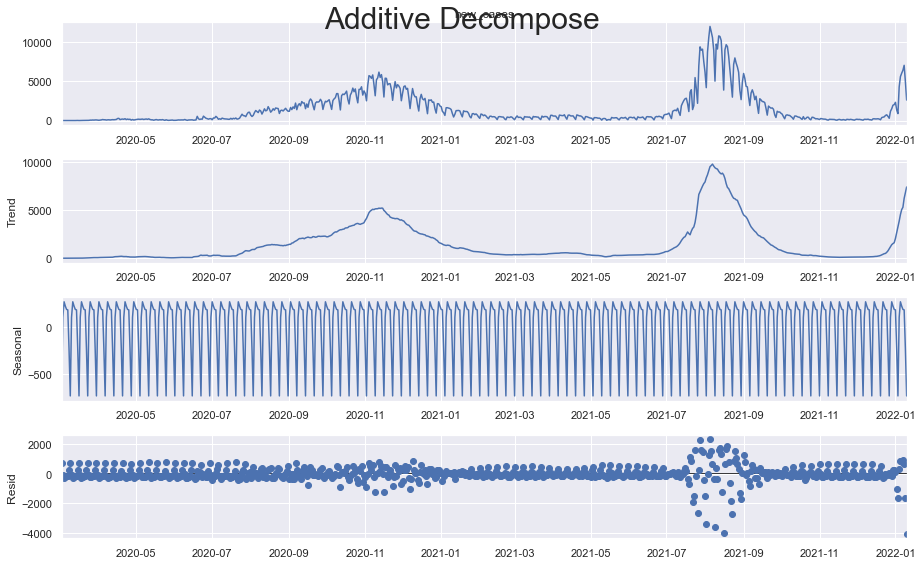

In [23]:
# First method
# Additive Decomposition

result_add = seasonal_decompose(Data_F['new_cases'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (13,8)})
result_add.plot().suptitle('Additive Decompose',fontsize=30)
plt.show()

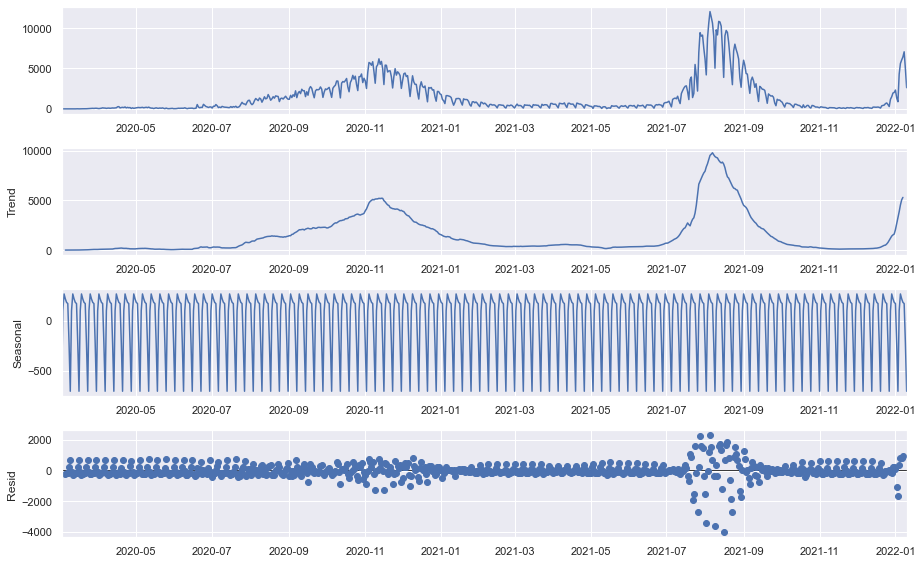

In [24]:
# Second method
dec=sm.tsa.seasonal_decompose(Data_F, model = 'additive')
fig = dec.plot()
plt.rcParams['figure.figsize'] = [13.0, 8.0]

# ACF et FACF

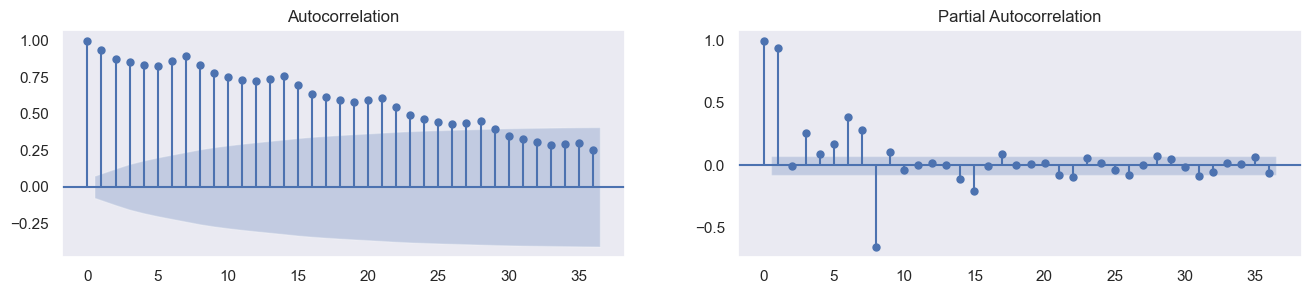

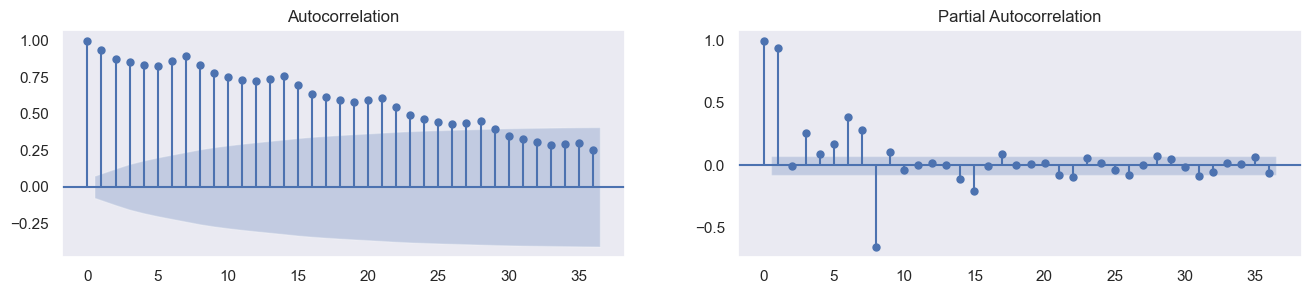

In [25]:
sns.set_style("dark")
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(Data_F.new_cases.tolist(), lags=36, ax=axes[0])
plot_pacf(Data_F.new_cases.tolist(), lags=36, ax=axes[1])

# BOX-JENKINS method

In [26]:
def chi_square_table(p,dof):
    return chi2.isf(p,dof)

def chi_sq_critical_val(alpha,dof):
    pr=1-alpha
    val=chi2.ppf(pr,dof)
    return val

def eval_arima(series,order,lags,dynamic=False,alpha=0.05):
 
    plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

    #fit the model
    model=ARIMA(series,order=order)   
    model_fit=model.fit(disp=-1)

    #print(type(model_fit))
    print(model_fit.summary())
    
    #display the fit of the model
    model_fit.plot_predict(dynamic=dynamic).suptitle("Model Fit on Training Data")
    plt.show()
    
    #get the residuals
    residuals=model_fit.resid
    #plot the residuals
    fig,ax=plt.subplots(1,2)

    residuals.plot(title='Residuals',ax=ax[0])
    residuals.plot(kind='kde',title='probability distribution of residuals',ax=ax[1])
    #print(model_fit.)
    plt.show()
    
    #are the residuals random?
    print(residuals.describe())
    #autocorrelation plots of residuals
    six_plots(residuals)
   
    #Significance Level at 5%
    #alpha=0.05

    #The Box-jenkins Method
    Q,p=ljungbox(residuals,range(1,lags),boxpierce=False)
    c=[]
    for i in range(len(Q)):
        dof=i+1                
        c.append(chi_sq_critical_val(alpha,dof))
        #print('Chi-statistic(Q) :',Q[i],'  p-value:',p[i],'   critical value: ',c," KEEP H0" if Q[i]<c else "DNT KEEP H0")
    
    #plot Q versus c
    #accept if Q stays below the 45 deg line i.e Q<c
    arstr="ARIMA"+str(order)+""
    plt.plot(c,Q,label=arstr)
    plt.plot(c,c,label='c=Q')
    plt.xlabel('Q values')
    plt.ylabel('critical values')
    plt.title('Ljung-Box Test')
    plt.legend()
    plt.show()
    return model_fit

In [27]:


def six_plots(df):
    
    df=df.dropna()
    plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
    fontdict={'fontsize':9,'verticalalignment':'bottom'}
    fig,ax=plt.subplots(2,3)
    df.plot(ax=ax[0,0])  
    df.hist(ax=ax[0,1]) #must be gaussian like
    sm.qqplot(df,ax=ax[0,2],line='45') # how close does the series fit the normal distribution. Quantile-Quantile
    lag_plot(df,ax=ax[1,0]) #lag-1 plot to see autocorrelations   
    plot_acf(df,ax=ax[1,1],title='') #acf plot
    plot_pacf(df,ax=ax[1,2],title='') #pacf plot
    
    left = 0.45
    bottom = -0.5
    top = 1.2
    
    ax[0,0].text(left, top, 'run sequence',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[0,0].transAxes)
    ax[0,1].text(left, top, 'histogramme',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[0,1].transAxes)
    ax[0,2].text(left, top, 'Q-Q',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax[0,2].transAxes)
    ax[0,2].set_xlabel('')
    ax[0,2].set_ylabel('')
    
    ax[1,0].text(left, bottom, 'Lag-plot',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax[1,0].transAxes)
    ax[1,1].text(left, bottom, 'ACF',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax[1,1].transAxes)    
    ax[1,2].text(left, bottom, 'PACF',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax[1,2].transAxes)
    
    fig.tight_layout()
    fig.suptitle('')
    plt.show()

# ARIMA(0,1,1)

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  543
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4926.332
Method:                       css-mle   S.D. of innovations           2095.830
Date:                Sat, 15 Jan 2022   AIC                           9858.664
Time:                        15:14:51   BIC                           9871.556
Sample:                             1   HQIC                          9863.705
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2682      0.572     -2.216      0.027      -2.390      -0.147
ma.L1.D.new_cases    -1.0000      0.005   -201.142      0.000      -1.010      -0.990
                        

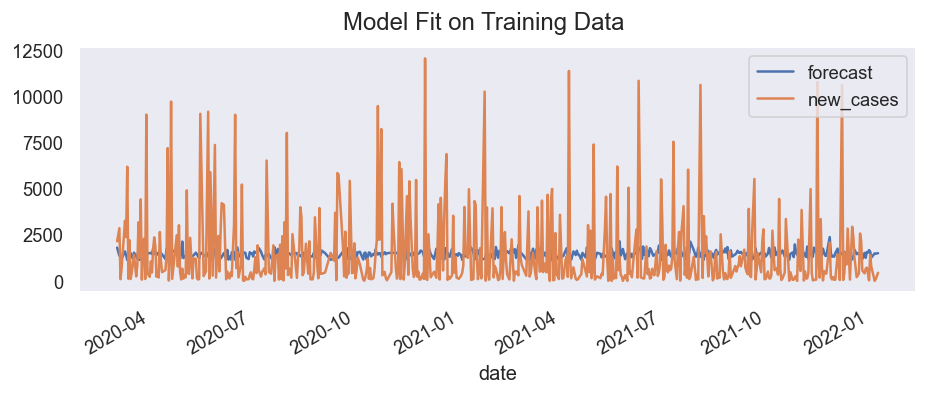

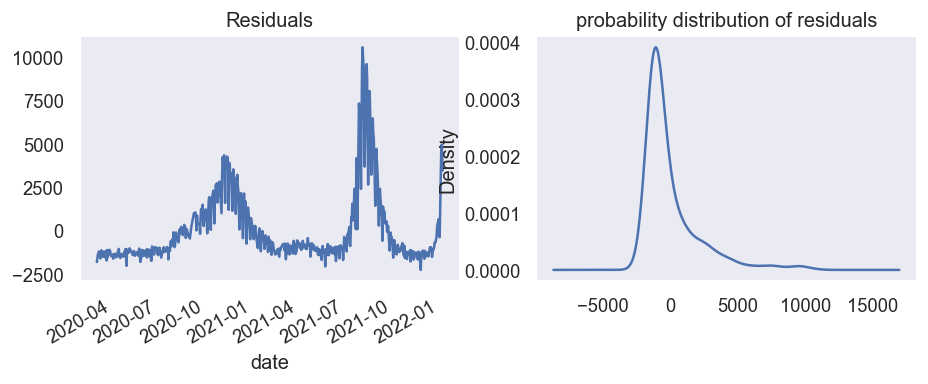

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


count      543.000000
mean        10.525654
std       2108.252828
min      -2256.292962
25%      -1221.890611
50%       -885.669383
75%        408.407645
max      10548.108427
dtype: float64


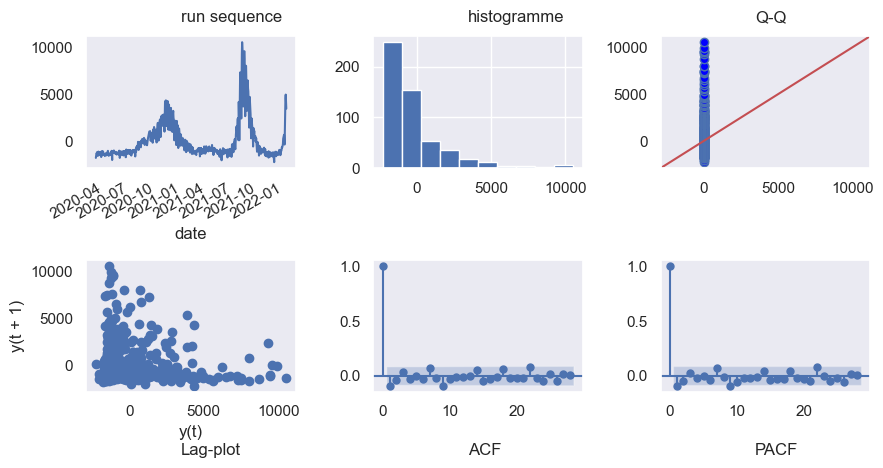

E:\anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


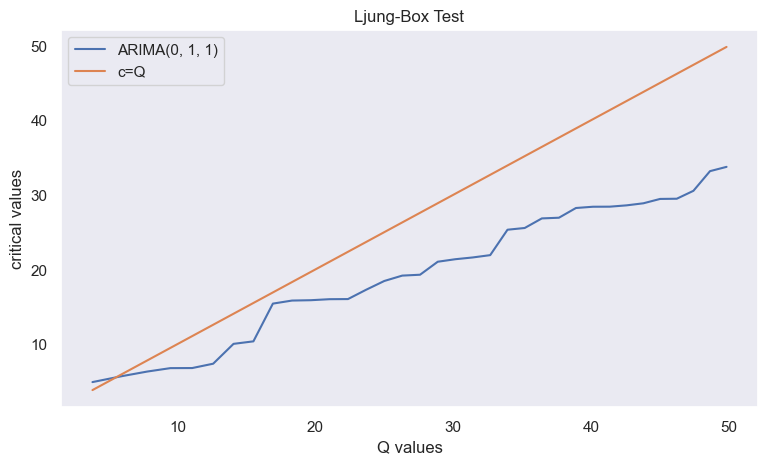

In [28]:
arima_011=eval_arima(train,order=(0,1,1),lags=36)


# ARIMA(2,1,0)

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  543
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5003.074
Method:                       css-mle   S.D. of innovations           2426.543
Date:                Sat, 15 Jan 2022   AIC                          10014.148
Time:                        15:15:07   BIC                          10031.336
Sample:                             1   HQIC                         10020.868
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.1103     49.148     -0.063      0.950     -99.439      93.218
ar.L1.D.new_cases    -0.7305      0.039    -18.522      0.000      -0.808      -0.653
ar.L2.D.new_cases    -0.

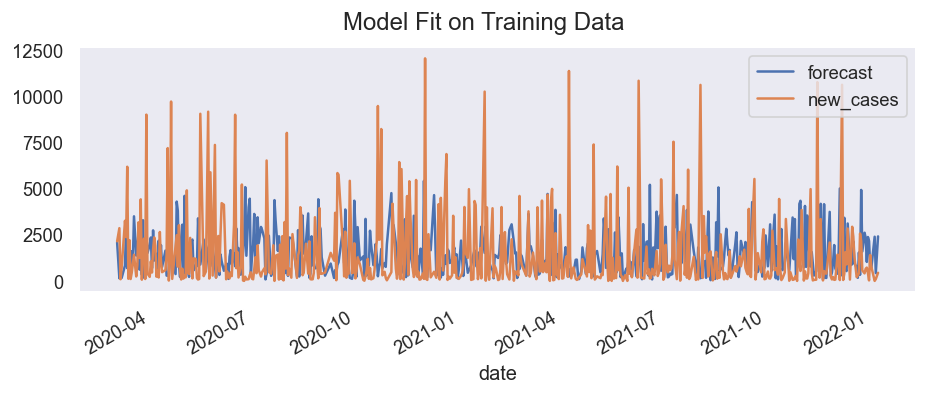

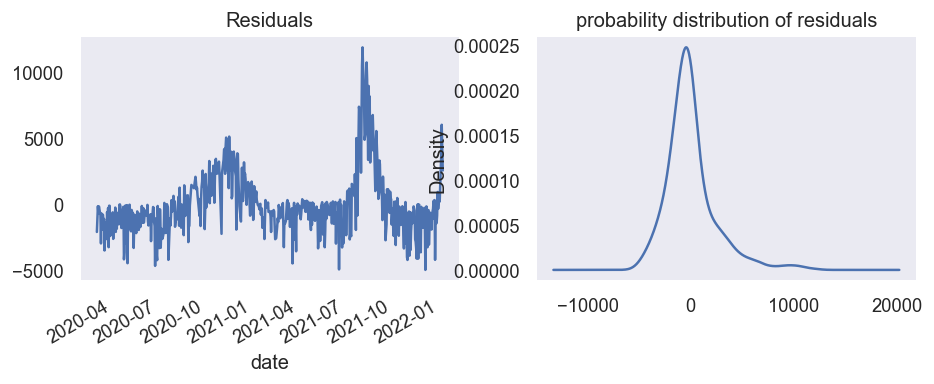

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


count      543.000000
mean         1.625014
std       2428.919819
min      -4947.830028
25%      -1344.488717
50%       -340.087701
75%        661.141954
max      11848.863532
dtype: float64


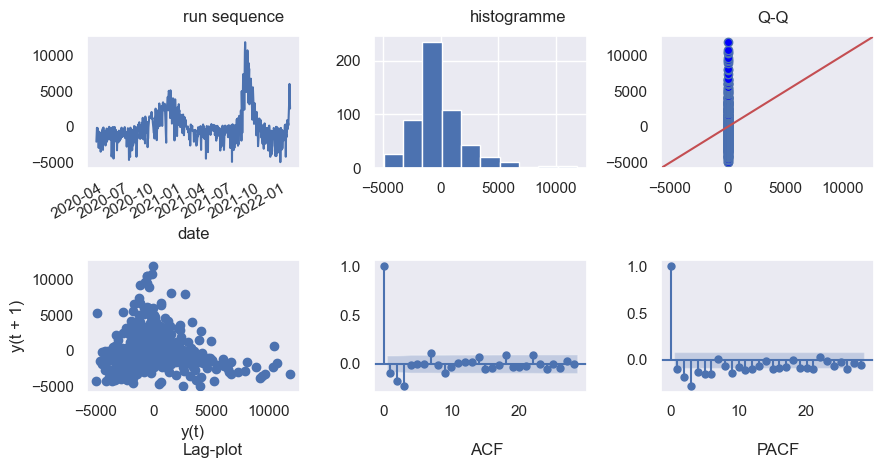

E:\anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


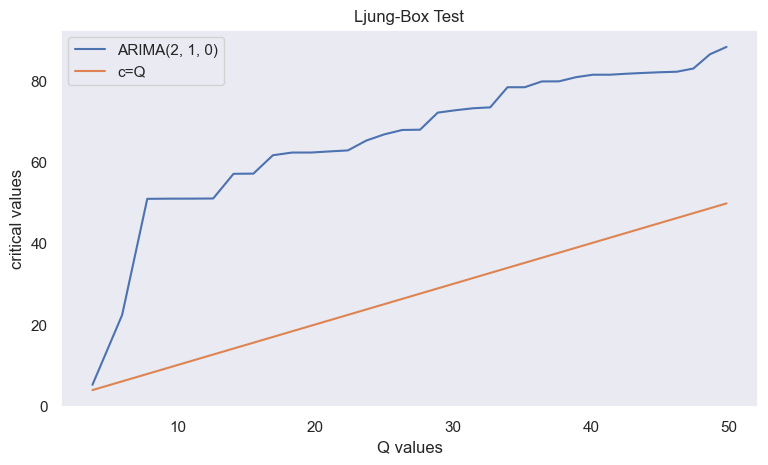

In [29]:
arima_210=eval_arima(train,order=(2,1,0),lags=36)


# ARIMA(2,1,1)

E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will b

                             ARIMA Model Results                              
Dep. Variable:            D.new_cases   No. Observations:                  543
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -4923.395
Method:                       css-mle   S.D. of innovations           2084.054
Date:                Sat, 15 Jan 2022   AIC                           9856.790
Time:                        15:15:22   BIC                           9878.276
Sample:                             1   HQIC                          9865.191
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2663      0.498     -2.543      0.011      -2.242      -0.290
ar.L1.D.new_cases    -0.0973      0.043     -2.270      0.023      -0.181      -0.013
ar.L2.D.new_cases    -0.

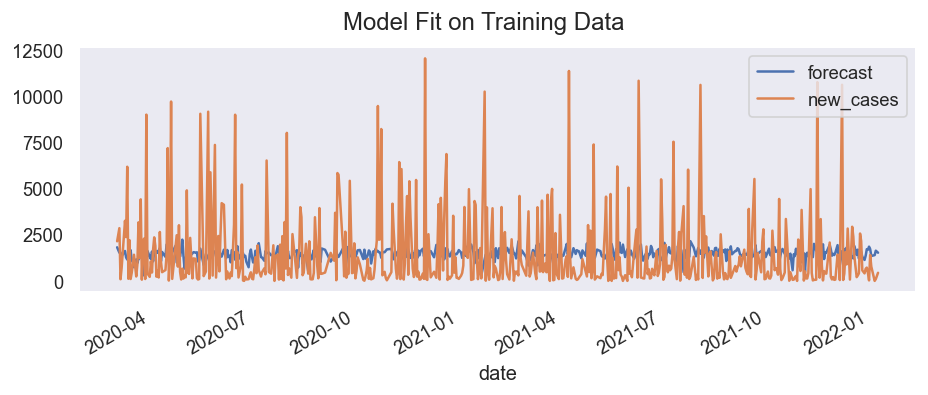

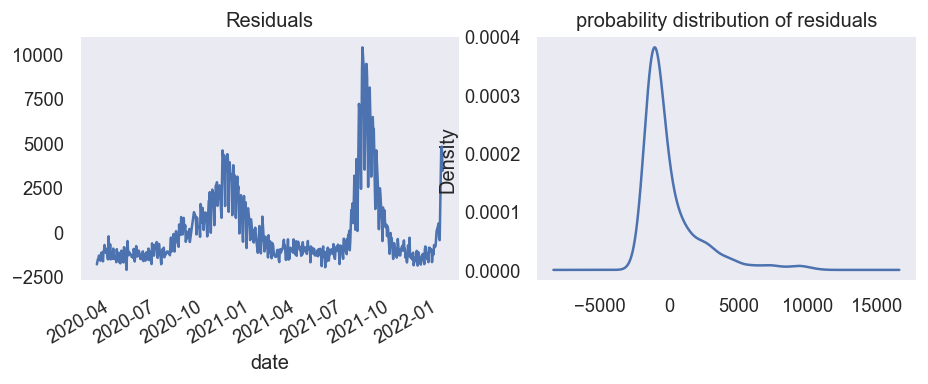

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


count      543.000000
mean        11.488239
std       2096.493706
min      -2130.558425
25%      -1236.539560
50%       -818.225365
75%        386.139932
max      10360.912884
dtype: float64


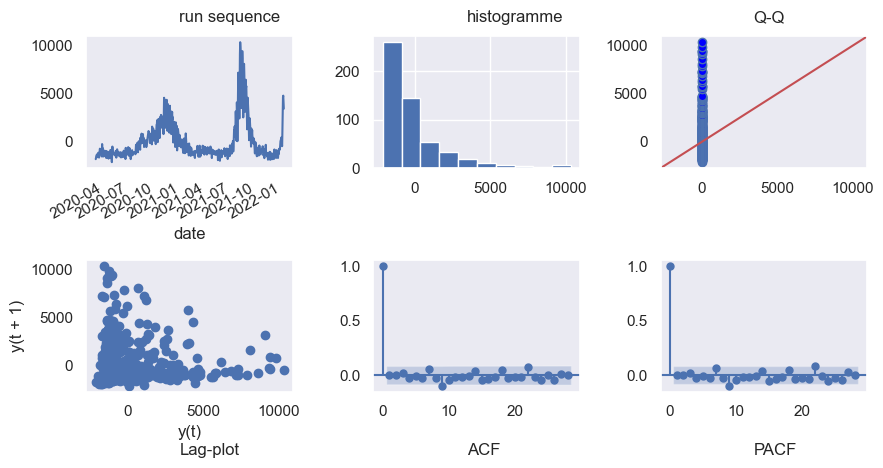

E:\anaconda\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


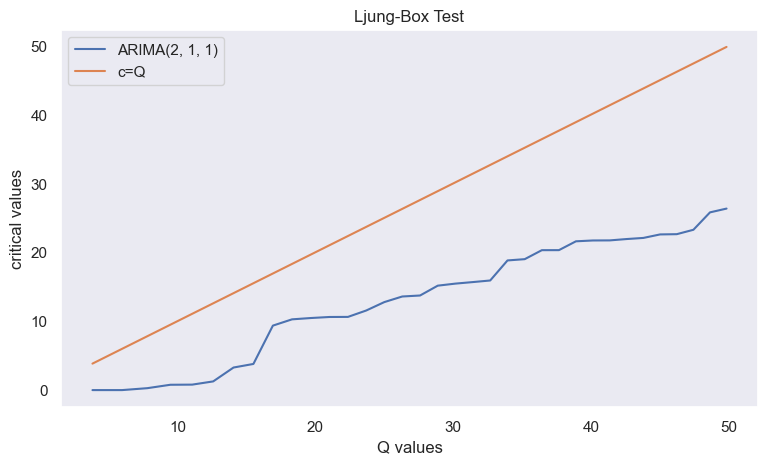

In [30]:
arima_211=eval_arima(train,order=(2,1,1),lags=36)

# END